# Import dependencies

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import os,sys

# Keypoints using MP Holistic

### Definitions

In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image,results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image,results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [5]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image,results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(43,180,255), thickness = 1,circle_radius=2),
                             mp_drawing.DrawingSpec(color=(255,0,255), thickness = 1,circle_radius=1)
                             )
    mp_drawing.draw_landmarks(image,results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(43,180,255), thickness = 2,circle_radius=3),
                             mp_drawing.DrawingSpec(color=(255,0,255), thickness = 3,circle_radius=3)
                             )
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(43,180,255), thickness = 2,circle_radius=3),
                             mp_drawing.DrawingSpec(color=(255,0,255), thickness = 2,circle_radius=1)
                             )
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(43,180,255), thickness = 2,circle_radius=3),
                             mp_drawing.DrawingSpec(color=(255,0,255), thickness = 2,circle_radius=1)
                             )

### Detecting from an image

In [6]:
#Enter picture input/ file path
rawpic = os.path.join("Guardian Demon 18.png")

#convert to a numpy array
pic = cv2.imread(rawpic)

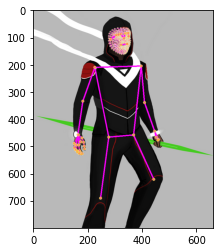

In [7]:
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    #make detections
    picpr, results = mediapipe_detection(pic, holistic)
    
    #draw landmarks
    #draw_landmarks(image, results)
    draw_styled_landmarks(picpr, results)
    
    #display image
    plt.imshow(cv2.cvtColor(picpr, cv2.COLOR_BGR2RGB))
    plt.show()

In [9]:
#Save output as jpeg
cv2.imwrite("out.jpg", picpr)

True

### Detecting from Webcam

In [8]:
cap = cv2.VideoCapture(0)
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        #read frame
        ret, frame = cap.read()

        #make detections
        image, results = mediapipe_detection(frame, holistic)

        #draw landmarks
        #draw_landmarks(image, results)
        draw_styled_landmarks(image, results)

        #show to screen
        cv2.imshow('OpenCV Feed', image)

        #break gracefully
        if cv2.waitKey(10) & 0xFF ==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [12]:
frame

array([[[115, 115, 127],
        [114, 114, 126],
        [113, 113, 125],
        ...,
        [138, 131, 121],
        [135, 128, 119],
        [138, 131, 122]],

       [[114, 114, 126],
        [112, 112, 124],
        [111, 112, 123],
        ...,
        [137, 130, 120],
        [136, 129, 120],
        [137, 130, 121]],

       [[113, 113, 125],
        [111, 112, 123],
        [109, 111, 122],
        ...,
        [136, 129, 119],
        [136, 129, 120],
        [132, 125, 116]],

       ...,

       [[128, 130, 130],
        [128, 130, 130],
        [128, 130, 130],
        ...,
        [196, 194, 176],
        [196, 194, 176],
        [197, 195, 177]],

       [[126, 128, 128],
        [127, 129, 129],
        [128, 130, 130],
        ...,
        [195, 193, 175],
        [195, 193, 175],
        [195, 193, 175]],

       [[126, 128, 128],
        [127, 129, 129],
        [128, 130, 130],
        ...,
        [195, 193, 175],
        [195, 193, 175],
        [195, 193, 175]]

In [10]:
frame2 =np.zeros(640*480)

In [13]:
frame.shape

(480, 640, 3)

In [69]:
frame1 = np.array([128,]*160)
frame2 = np.array([frame1,frame1,frame1]*213,dtype=np.uint8)
frame3 = np.array([frame2,frame2,frame2])

In [70]:
frame3.shape

(3, 639, 160)

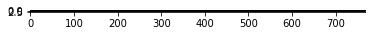

In [40]:
plt.imshow(frame3, cmap="gray")
plt.show()

## Detecting from a video

In [16]:
#Enter video input/ file path
video = "Hip Hop 2020 Video Mix (NEW HITS) - R&B 2020 - Dancehall (RAP, TRAP, HIPHOP, DRAKE, CARDI B, DABABY).mkv_20220218_174621.mp4"

In [17]:
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    #Establish capture
    cap = cv2.VideoCapture(os.path.join(video))
    
    #Setup Video writer
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    fps = cap.get(cv2.CAP_PROP_FPS)
    
    #Videowriter
    video_writer = cv2.VideoWriter(os.path.join('output3.mp4'), cv2.VideoWriter_fourcc('M','P','4','2'), fps, (width, height))
    
    # Loop through each frame
    for frame_idx in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
        #read frame
        ret, frame = cap.read()

        #make detections
        image, results = mediapipe_detection(frame, holistic)

        #draw landmarks
        #draw_landmarks(image, results)
        draw_styled_landmarks(image, results)

        #show to screen
        cv2.imshow('OpenCV Feed', image)
        
        #Write out frame
        #video_writer.write(image)

        #Breaking the loop
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    #close down everything
    cap.release()
    cv2.destroyAllWindows()
    video_writer.release()

## Extracting keypoint values

In [26]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh =np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

## Setup Folders for Collection

In [28]:
#Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_DATA')

#Actions that we are trying to deetect
actions = np.array(['hello', 'thanks', 'iloveyou'])

#Thirty videos worth of data
no_sequences = 30

#videos are going to be 30 frames in length
sequence_length = 30

In [30]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
                pass

## Collect Keypoint Values for Training and Testing

In [ ]:
cap = cv2.VideoCapture(0)
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    #loop through actions
    for action in actions:
        #loop through videos
        for sequence in range(no_sequences):
            #loop through video length aka sequence length
            for frame_num in range(sequence_length):
                #read frame
                ret, frame = cap.read()

                #make detections
                image, results = mediapipe_detection(frame, holistic)

                #draw landmarks
                #draw_landmarks(image, results)
                draw_styled_landmarks(image, results)

                #show to screen
                cv2.imshow('OpenCV Feed', image)

                #break gracefully
                if cv2.waitKey(10) & 0xFF ==ord('q'):
                    break
            cap.release()
            cv2.destroyAllWindows()